In [7]:
#Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import uncertainties as u 
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy

In [8]:
# Constants and values

d = ufloat(21.5, 0.4)*10**(-3) #m
l = ufloat(123.6, 0.2)*10**(-3) #m
m = ufloat(298.55, 0.01)*10**(-3) #kg
T = ufloat(6.409, 0.21697158032025) #s

mu_0 = 4*np.pi*10**(-7) #N/A^2


In [9]:
#Reading data

data = pd.read_excel('data/data.xlsx')

hist_u1 = pd.read_csv('data/TEK0000.csv')
hist_uc = pd.read_csv('data/TEK0001.csv')

In [10]:
#Geomagnetické pole

tan_1 = []
for ii,ID in enumerate(data['G1']):
    tan_1.append(ufloat(np.tan(np.radians((data['G1'][ii]+data['G1_rot'][ii])/2)), np.std(np.array([np.tan(np.radians(data['G1'][ii])),np.tan(np.radians(data['G1_rot'][ii]))]))))
data['tan_1'] = tan_1

tan_2 = []
for ii,ID in enumerate(data['G2']):
    tan_2.append(ufloat(np.tan(np.radians((data['G2'][ii]+data['G2_rot'][ii])/2)), np.std(np.array([np.tan(np.radians(data['G2'][ii])),np.tan(np.radians(data['G2_rot'][ii]))]))))
data['tan_2'] = tan_2

data['A'] = ((4*np.pi*data['r']**3 / 7) * (3*data['tan_1']/2 + 4*data['tan_2'])) 

A_values = []
A_errors = []
for ii,ID in enumerate(data['A']):
    A_values.append(data['A'][ii].nominal_value)
    A_errors.append(data['A'][ii].std_dev)

A = ufloat(np.mean(np.abs(A_values)), np.sqrt(np.std(np.abs(A_values))**2 + np.mean(np.abs(A_errors))**2))

print('A =', A, 'm^3')

J = m/4 * ((d/2)**2 + (l**2/3))

print('J =', J*10**4, 'e-4 kg m^2')

B = (np.pi**2 * J) / (T**2)

print('B =', B)

H_z = sqrt(B/A) *10**(3)

print('H_z =', H_z)

M = sqrt(A*B) * 10**(-3)

print('M =', M)

print(data)

A = 0.39+/-0.06 m^3
J = 3.887+/-0.013 e-4 kg m^2
B = (9.3+/-0.6)e-05
H_z = 15.5+/-1.2
M = (6.0+/-0.5)e-06
     r  G1  G1_rot  G2  G2_rot          tan_1                   tan_2  \
0  0.2  78      82  74      77      5.7+/-1.2               3.9+/-0.4   
1  0.3  57      61  51      51    1.66+/-0.13  1.2348971565350515+/-0   
2  0.4  42      40  33      34  0.869+/-0.031           0.662+/-0.013   
3 -0.2  80      75  73      79      4.5+/-1.0               4.0+/-0.9   
4 -0.3  62      55  53      54    1.63+/-0.23           1.351+/-0.025   
5 -0.4  41      39  35      33  0.839+/-0.030           0.675+/-0.025   

                A  
0     0.34+/-0.04  
1   0.360+/-0.010  
2   0.454+/-0.008  
3    -0.33+/-0.06  
4  -0.381+/-0.017  
5  -0.455+/-0.013  


In [11]:
#Magnetická odezva feromagnetického materiálu

r_min = ufloat(9.75, 0.02)*10**(-3) #m
r_max = ufloat(14.5, 0.02)*10**(-3) #m
h = ufloat(7, 0.02)*10**(-3) #m

R_1 = 83 #Ohm
R_2 = 120*10**3 #Ohm
N_1 = 260
N_2 = 900
C = 1 * 10**(-6) #F

U_1 = 0.92 #V
U_c_r = 0.0525 #V
U_c_s = 0.1062 #V

r = (r_min + r_max)/2

H = N_1/(2*np.pi*r*R_1) * U_1

print('H =', H)

S = (r_max - r_min)*h

print('S =', S)

B_r = R_2*C/(N_2*S) * U_c_r

print('B_r =', B_r)

B_s = R_2*C/(N_2*S) * U_c_s

print('B_s =', B_s)

M_r = B_r/ mu_0 - H

print('M_r =', M_r)

M_s = B_s/ mu_0 - H

print('M_s =', M_s)

H = 37.83+/-0.04
S = (3.325+/-0.022)e-05
B_r = 0.2105+/-0.0014
B_s = 0.4259+/-0.0028
M_r = (1.675+/-0.011)e+05
M_s = (3.389+/-0.022)e+05


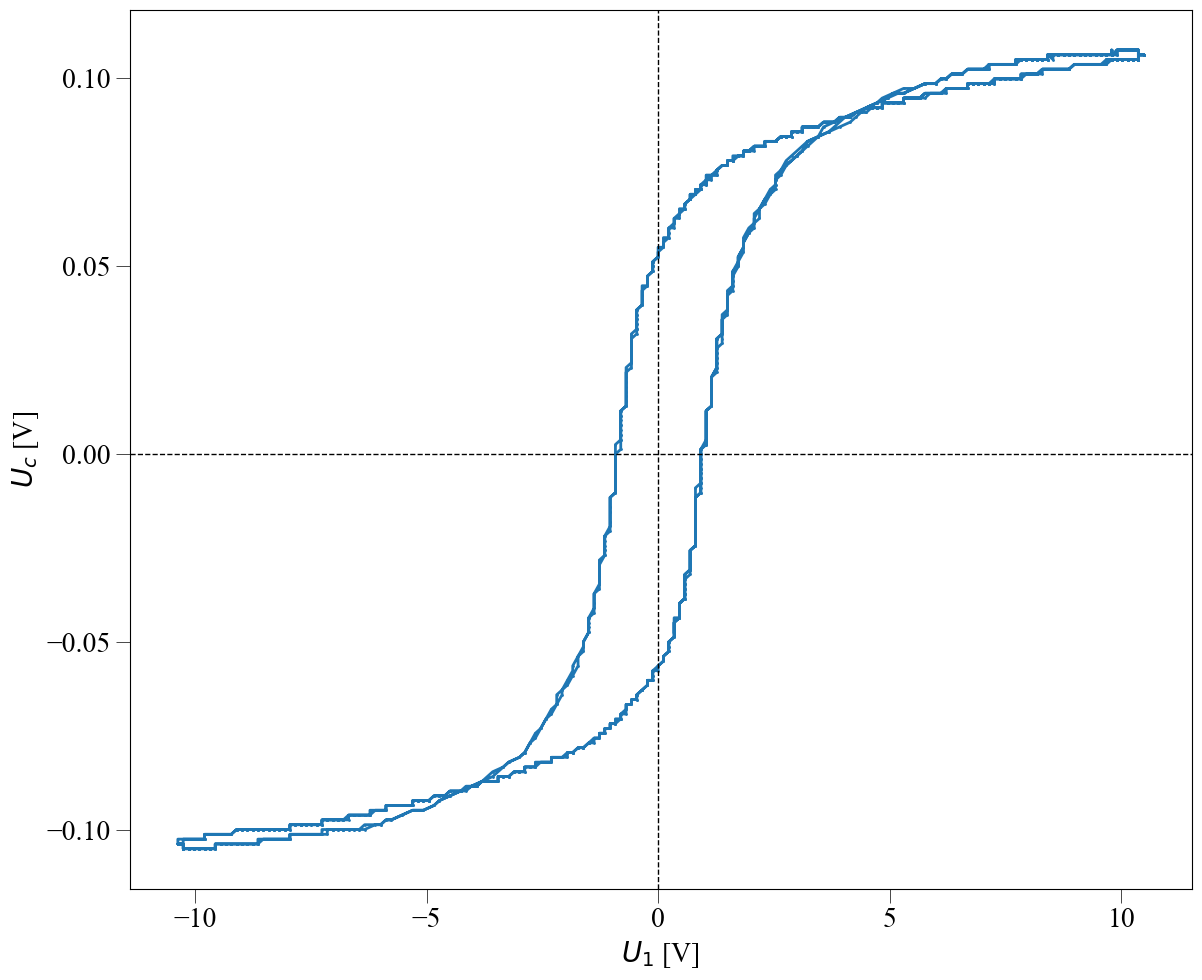

In [12]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(12, 10))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$U_1$ [V]")
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel(r"$U_c$ [V]")
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=20)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=20)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(hist_u1['U_1'], hist_uc['U_c'], color=colors[5], s=1)
ax.plot(hist_u1['U_1'], hist_uc['U_c'], color=colors[5], linewidth=2)
ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax.axvline(x=0, color='black', linestyle='--', linewidth=1)


plt.show() 

fig.savefig('images/hist_curve.png', bbox_inches='tight')